# Load data from csvs

In [1]:
import unicodecsv

enrollments_filename = 'enrollments.csv'

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open(enrollments_filename, 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open(enrollments_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
### Write code similar to the above to load the engagement
### and submission data. The data is stored in files with
### the given filenames. Then print the first row of each
### table to make sure that your code works. You can use the
### "Test Run" button to see the output of your code.

engagement_filename = 'daily_engagement.csv'
submissions_filename = 'project_submissions.csv'

with open(engagement_filename, 'rb') as k:
    reader2 = unicodecsv.DictReader(k)
    daily_engagement=list(reader2)
with open(submissions_filename, 'rb') as l:
    reader3 = unicodecsv.DictReader(l)
    project_submissions=list(reader3)   

print(enrollments[0])    
print(daily_engagement[0])   # Replace this with your code
print(project_submissions[0])  # Replace this with your code


OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


# Fixing Data Types

In [2]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [3]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [4]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

# Problems in the Data

In [5]:
#change key 'acct' to 'account_keys' in list daily_engagement
for element in daily_engagement:
    element['account_key']=element['acct']
    element.pop('acct')
print(daily_engagement[0]['account_key'])    

0


# Investigating the Data

In [6]:
enrollment_num_rows = len(enrollments)           # Replace this with your code
#enrollment_num_unique_students = 0  # Replace this with your code
print(enrollment_num_rows)

engagement_num_rows = len(daily_engagement)           # Replace this with your code
#engagement_num_unique_students = 0  # Replace this with your code
print(engagement_num_rows)

submission_num_rows = len(project_submissions)           # Replace this with your code
#submission_num_unique_students = 0  # Replace this with your code
print(submission_num_rows)

1640
136240
3642


In [7]:
def unique_students(list_name):
    unique_students_list=[]
    for element in list_name:
       if element['account_key'] not in unique_students_list:
            unique_students_list.append(element['account_key'])
    return unique_students_list       

In [8]:
account_keys_in_enrollments=unique_students(enrollments)
enrollment_num_unique_students = len(account_keys_in_enrollments) 
print(enrollment_num_unique_students)

account_keys_in_daily_engagement=unique_students(daily_engagement)
engagement_num_unique_students = len(account_keys_in_daily_engagement) 
print(engagement_num_unique_students)

account_keys_in_project_submissions=unique_students(project_submissions)
submission_num_unique_students=len(account_keys_in_project_submissions) 
print(submission_num_unique_students)

1302
1237
743


account_keys_in_enrollments=[]
for enrollment in enrollments:
    if enrollment['account_key'] not in account_keys_in_enrollments:
       account_keys_in_enrollments.append(enrollment['account_key']) 
enrollment_num_unique_students = len(account_keys_in_enrollments) 
print(enrollment_num_unique_students)

account_keys_in_daily_engagement=[]
for engagement in daily_engagement:
    if engagement['acct'] not in account_keys_in_daily_engagement:
       account_keys_in_daily_engagement.append(engagement['acct']) 
engagement_num_unique_students = len(account_keys_in_daily_engagement) 
print(engagement_num_unique_students)

account_keys_in_project_submissions=[]
for submission in project_submissions:
    if submission['account_key'] not in account_keys_in_project_submissions:
       account_keys_in_project_submissions.append(submission['account_key']) 
submission_num_unique_students=len(account_keys_in_project_submissions) 
print(submission_num_unique_students)

In [9]:
special_students=[]
for element in account_keys_in_enrollments:
    if element not in account_keys_in_daily_engagement:
        special_students.append(element)
print(special_students)
print(len(special_students))

['1219', '871', '1218', '654', '964', '817', '1171', '884', '875', '1120', '728', '1191', '1304', '1010', '841', '707', '717', '727', '1273', '1238', '1044', '749', '1129', '926', '711', '803', '799', '789', '819', '902', '996', '1213', '733', '1237', '1069', '1086', '1190', '914', '968', '1155', '766', '739', '1222', '1125', '1025', '750', '889', '737', '878', '981', '1101', '1148', '1186', '725', '1145', '802', '664', '997', '870', '1284', '1079', '1063', '1270', '1291', '1241']
65


In [10]:
time_duration=set()
for element in enrollments:
    if element['account_key'] in special_students:
        if element['join_date']==element['cancel_date']:
            time_duration.add(element['account_key'])
print(time_duration) 
print(len(time_duration))

{'1120', '1186', '750', '654', '964', '926', '997', '1145', '711', '1191', '914', '802', '871', '819', '664', '739', '1238', '1222', '1044', '749', '902', '803', '733', '1218', '968', '981', '1190', '728', '707', '1125', '1025', '1171', '1079', '841', '817', '1219', '1069', '1213', '878', '717', '1284', '1086', '766', '889', '1010', '1129', '996', '1148', '1155', '1237', '884', '1241', '789', '737', '799', '1273', '870', '1270', '725', '1063', '875', '1291', '727'}
63


In [11]:
time_duration2=set()
for element in enrollments:
    if element['account_key'] in special_students:
        if element['join_date']!=element['cancel_date']:
            time_duration2.add(element['account_key'])
print(time_duration2) 
print(len(time_duration2))

{'1304', '1101'}
2


In [12]:
for element in enrollments:
    if element['account_key']=='1101':
        print(element)
        break

OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


In [13]:
for element in enrollments:
    if element['account_key']=='1304':
        print(element)
        break

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])


#guess reason canceled not include in daily_engagement proved wrong
canceled_account_keys=[]
for element in enrollments:
    if element['status']=='canceled':
        if element['account_key'] not in canceled_account_keys:
            canceled_account_keys.append(element['account_key'])
#print(canceled_account_keys)            
            
special_students2=[]
for element in special_students:
    if element not in canceled_account_keys:
        special_students2.append(element)
print(special_students2)        

In [14]:
thisset=set()
thisset.add('apple')
thisset.add('banana')
thisset.add('apple')
print(thisset)

{'apple', 'banana'}


In [15]:
udacity_test_accounts=set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
print(len(udacity_test_accounts))  
print(udacity_test_accounts)

6
{'448', '1069', '312', '818', '1304', '1101'}


In [16]:
for element in enrollments:
    if element['account_key']=='1069':
        print(element)
        break

OrderedDict([('account_key', '1069'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 6, 1, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 1, 0, 0)), ('days_to_cancel', 0), ('is_udacity', True), ('is_canceled', True)])


In [17]:
def remove_udacity_accounts(list_name):
    non_udacity_list=[]
    for element in list_name:
        if element['account_key'] not in udacity_test_accounts:
            non_udacity_list.append(element)
    return non_udacity_list        

In [18]:
non_udacity_enrollments=remove_udacity_accounts(enrollments)  
non_udacity_engagement=remove_udacity_accounts(daily_engagement) 
non_udacity_submissions=remove_udacity_accounts(project_submissions) 

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


# Data from first week

In [19]:
paid_student={}
for element in non_udacity_enrollments:
    if not element['is_canceled'] or element['days_to_cancel']>7:
        if element['account_key'] not in paid_student or \
           element['join_date']>paid_student[element['account_key']]:
            paid_student[element['account_key']]=element['join_date']
    
            
print(len(paid_student))    

995


In [20]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [21]:
paid_engagement_in_first_week = []
for element in non_udacity_engagement:
    acct=element['account_key']
    if acct in paid_student:
        if within_one_week(paid_student[acct],element['utc_date']):
            paid_engagement_in_first_week.append(element)
            
print(len(paid_engagement_in_first_week))           
print(paid_engagement_in_first_week[2])

6919
OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])


# Exploring student engagement

In [22]:
from collections import defaultdict

engagement_by_account=defaultdict(list)
for element in paid_engagement_in_first_week:
    acct=element['account_key']
    engagement_by_account[acct].append(element)
print(len(engagement_by_account))
print(engagement_by_account['0'])

995
[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.2848873333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 33.4892696667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 13, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 64.7796776667), ('lessons_comple

In [23]:
total_minutes_by_account={}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes=0
    for element in engagement_for_student:
        total_minutes+=element['total_minutes_visited']
    total_minutes_by_account[account_key]=total_minutes    

In [24]:
##python3 list
total_minutes=list(total_minutes_by_account.values())

import numpy as np

print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [25]:
lessons_completed_by_account={}

for account_key, engagement_for_student in engagement_by_account.items():
    lessons_completed=0
    for element in engagement_for_student:
            lessons_completed=lessons_completed+element['lessons_completed']
    lessons_completed_by_account[account_key]=lessons_completed    

In [26]:
lessons_completed=list(lessons_completed_by_account.values())

import numpy as np

print('Mean:', np.mean(lessons_completed))
print('Standard deviation:', np.std(lessons_completed))
print('Minimum:', np.min(lessons_completed))
print('Maximum:', np.max(lessons_completed))

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


# Number of days visited

In [30]:
total_days_by_account={}

for account_key, engagement_for_student in engagement_by_account.items():
    total_days=0
    for element in engagement_for_student:
        if element['total_minutes_visited']>0:
            total_days+=1
    total_days_by_account[account_key]=total_days   

In [31]:
days_visited=list(total_days_by_account.values())

import numpy as np

print('Mean:', np.mean(days_visited))
print('Standard deviation:', np.std(days_visited))
print('Minimum:', np.min(days_visited))
print('Maximum:', np.max(days_visited))

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


# splitting out passing student

In [60]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

passing_engagement = []
non_passing_engagement = []
subway_project_lesson_keys = ['746169184', '3176718735']
pass_project = set()
for submission in non_udacity_submissions:
    rating = submission['assigned_rating']
    project = submission['lesson_key']
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_project.add(submission['account_key'])

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
print(len(passing_engagement))
print(len(non_passing_engagement))
                    
print(passing_engagement[0])                    

4527
2392
OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])


# Comparing the Two Student Groups

In [62]:
def sum_grouped_items(data, key_name):
    from collections import defaultdict
    
    engagement_by_account=defaultdict(list)
    for element in data:
        acct=element['account_key']
        engagement_by_account[acct].append(element)
        
    total_values_by_key_name={}
    for account_key, engagement_for_student in engagement_by_account.items():
        total_values=0
        for element in engagement_for_student:
            total_values+=element[key_name]
        total_values_by_key_name[account_key]=total_values
    return total_values_by_key_name  

In [65]:
total_minutes_passing_engagement=sum_grouped_items(passing_engagement, 'total_minutes_visited')
total_minutes_passing_engagement1=list(total_minutes_passing_engagement.values())


import numpy as np

print('Mean:', np.mean(total_minutes_passing_engagement1))
print('Standard deviation:', np.std(total_minutes_passing_engagement1))
print('Minimum:', np.min(total_minutes_passing_engagement1))
print('Maximum:', np.max(total_minutes_passing_engagement1))


Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

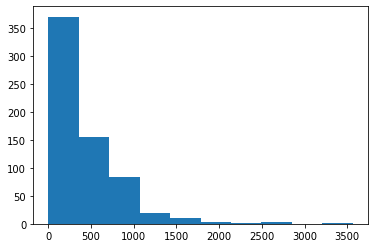

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(total_minutes_passing_engagement1)

In [64]:
total_minutes_non_passing_engagement=list(sum_grouped_items(non_passing_engagement,'total_minutes_visited').values())

import numpy as np

print('Mean:', np.mean(total_minutes_non_passing_engagement))
print('Standard deviation:', np.std(total_minutes_non_passing_engagement))
print('Minimum:', np.min(total_minutes_non_passing_engagement))
print('Maximum:', np.max(total_minutes_non_passing_engagement))



Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


# Making Histograms

(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

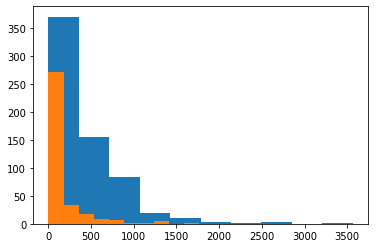

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(total_minutes_passing_engagement1)
plt.hist(total_minutes_non_passing_engagement)

# Improving Plots and Sharing Findings

Text(0.5, 1.0, 'Distribution of total minutes visited in the first week for students who pass the subway project')

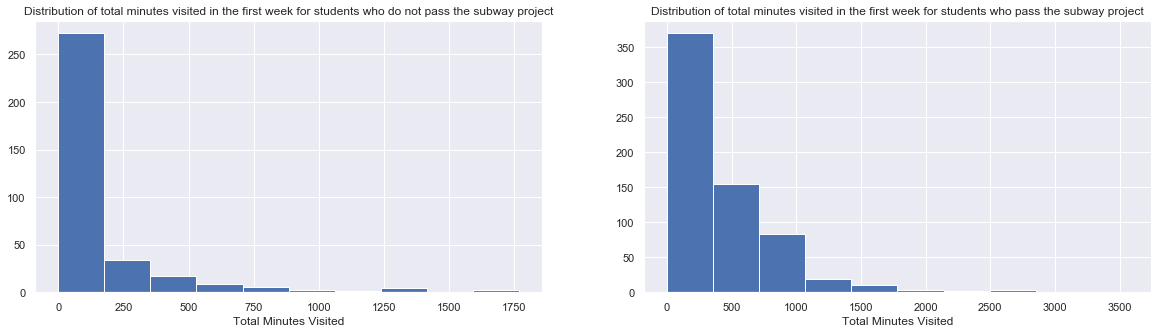

In [74]:
import seaborn as sns
sns.set()
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(total_minutes_non_passing_engagement)
plt.xlabel('Total Minutes Visited')
plt.title('Distribution of total minutes visited in the first week ' + 
          'for students who do not pass the subway project')
plt.subplot(1, 2, 2)
plt.hist(total_minutes_passing_engagement1)
plt.xlabel('Total Minutes Visited')
plt.title('Distribution of total minutes visited in the first week ' + 
          'for students who pass the subway project')

In [75]:
print(True+True)

2


In [76]:
print(False+True)

1


In [77]:
print(False+False)

0


In [78]:
print([True,False]+[False,True])

[True, False, False, True]


In [1]:
import pandas as pd

entries_and_exits = pd.DataFrame(
    {'ENTRIESn': [10, 40, 60, 65, 85], 'EXITSn': [0, 10, 20, 60, 60]},
    index=[0, 1, 2, 3, 4]
)
hourly_entries_and_exits=entries_and_exits/24
print(hourly_entries_and_exits)

   ENTRIESn    EXITSn
0  0.416667  0.000000
1  1.666667  0.416667
2  2.500000  0.833333
3  2.708333  2.500000
4  3.541667  2.500000
